In [31]:
import heapq
import matplotlib.pyplot as plt

class Puzzle:
    def __init__(self, state, parent_node=None, move=None, cost=0, heuristic_type=None):
        self.state = state
        self.parent_node = parent_node
        self.move = move
        self.cost = cost
        self.heuristic_type = heuristic_type
        self.heuristic = self.calculate_heuristic()

    def __lt__(self, other):
        return (self.cost + self.heuristic) < (other.cost + other.heuristic) # how to compare two nodes when using heapq

    def calculate_heuristic(self):
        if self.heuristic_type == "1":  # Uniform Cost Search
            return 0
        elif self.heuristic_type == "2":  # Misplaced Tile
            return sum(
                1 for i in range(3) for j in range(3)
                if self.state[i][j] != 0 and self.state[i][j] != goal_state[i][j]
            )
        elif self.heuristic_type == "3":  # Manhattan Distance
            heuristic = 0
            for i in range(3):
                for j in range(3):
                    val = self.state[i][j]
                    if val != 0:
                        goal_i, goal_j = divmod(val - 1, 3) # divmod(a, b) gives (a // b, a % b) at the same time, where it should be
                        heuristic += abs(i - goal_i) + abs(j - goal_j)
            return heuristic
        else:
            raise ValueError("unknown heuristic type")

def is_valid_move(i, j): # check if valid
    return 0 <= i < 3 and 0 <= j < 3

def expand(node):
    neighbors = []
    i, j = next((i, j) for i in range(3) for j in range(3) if node.state[i][j] == 0)
    for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        new_i, new_j = i + di, j + dj
        if is_valid_move(new_i, new_j):
            new_state = [row[:] for row in node.state] # Deep copy of current state
            new_state[i][j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[i][j]  # Swap blank tile with the adjacent tile
            neighbors.append(Puzzle(new_state, node, (di, dj), node.cost + 1, node.heuristic_type))  # Create a new node and add to neighbors
    return neighbors

def goal_test(state): # The final state we want
    return state == goal_state


def general_search(initial_state, heuristic_type=None):
    nodes = [Puzzle(initial_state, heuristic_type=heuristic_type)]
    closed_set = set()
    nodes_expanded = 0
    max_queue_size = 1 # track maximum size of  priority queue


    while not len(nodes) == 0:
        node = heapq.heappop(nodes)  # get node with lowest f(n)
        nodes_expanded += 1

        if goal_test(node.state):
            return reconstruct_path(node), nodes_expanded, max_queue_size

        closed_set.add(tuple(map(tuple, node.state)))

        for child in expand(node):
            state_tuple = tuple(map(tuple, child.state))
            if state_tuple not in closed_set:
                heapq.heappush(nodes, child) # ddd valid child to priority queue
                max_queue_size = max(max_queue_size, len(nodes))  # update max queue size

    return None, nodes_expanded, max_queue_size

def reconstruct_path(node):
    path = []
    while node:
        path.append(node)
        node = node.parent_node
    return path[::-1] # return path from start to goal

if __name__ == "__main__":
    goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]   # The final state we want

    print('The initial state of the 8-puzzle.')
    print('Please enter one row at a time with space-separated numbers.')
    initial_state = []
    numbers = set()

    for i in range(3):
        while True:
            try:
                row = list(map(int, input(f"Row {i+1}: ").strip().split()))
                if len(row) != 3 or any(n < 0 or n > 8 for n in row):
                    raise ValueError("Please input 3 numbers between 0 and 8.")
                if len(set(row)) != 3:
                    raise ValueError("Duplicate numbers.")       # check for duplicates in one row
                if any(n in numbers for n in row):
                    raise ValueError("Duplicate numbers.")       # check for duplicates in all
                numbers.update(row)
                initial_state.append(row)
                break  # Only break if everything is fine
            except ValueError as e:
                print(f"{e}")

    print("\nChoose search algorithm:")
    print("1. Uniform Cost Search")
    print("2. A* Misplaced Tile heuristic")
    print("3. A* Manhattan Distance heuristic")

    while True:
        choice = input("Heuristic choice: ").strip()
        if choice in ["1", "2", "3"]:
            break
        print("Invalid choice. Please enter 1, 2, or 3.")

    path, nodes_expanded, max_queue_size = general_search(initial_state, heuristic_type=choice)

    if path:
        print("\nSolution found! Moves to reach goal state:\n")
        for idx, node in enumerate(path):
            print(f"Step {idx}: g(n) = {node.cost}, h(n) = {node.heuristic}")
            for row in node.state:
                print(" ".join(str(n) if n != 0 else "_" for n in row))
            print("-" * 20)

        print("\nSummary:")
        print(f"Solution depth was {len(path) - 1}")
        print(f"Number of nodes expanded: {nodes_expanded}")
        print(f"Max queue size: {max_queue_size}")
    else:
        print("No solution found.")


The initial state of the 8-puzzle.
Please enter one row at a time with space-separated numbers.


Row 1:  1 2 3
Row 2:  4 5 6
Row 3:  7 0 8



Choose search algorithm:
1. Uniform Cost Search
2. A* Misplaced Tile heuristic
3. A* Manhattan Distance heuristic


Heuristic choice:  3



Solution found! Moves to reach goal state:

Step 0: g(n) = 0, h(n) = 1
1 2 3
4 5 6
7 _ 8
--------------------
Step 1: g(n) = 1, h(n) = 0
1 2 3
4 5 6
7 8 _
--------------------

Summary:
Solution depth was 1
Number of nodes expanded: 2
Max queue size: 3


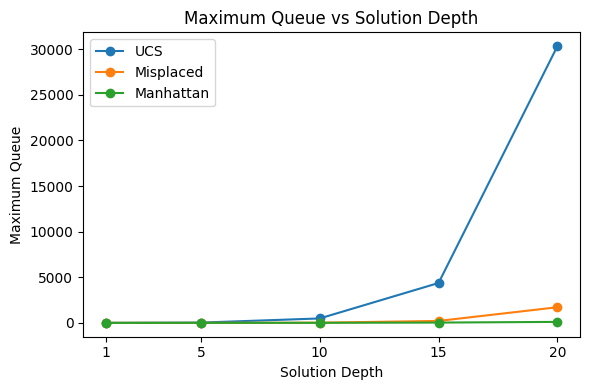

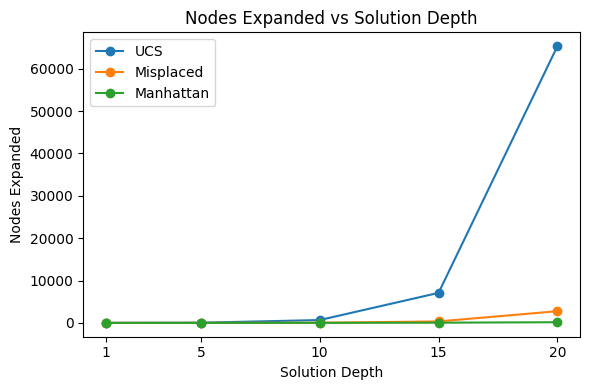

In [32]:
## depth = [1,5,10,15,20]
UCS_max_queue = [3, 34, 490, 4375, 30331]
UCS_nodes_expanded = [2, 42, 671, 7084, 65319]
Misplaced_max_queue = [3, 7, 24, 217, 1718]
Misplaced_nodes_expanded = [2, 6, 30, 348, 2764]
Manhattan_max_queue = [3, 7, 12, 37, 112]
Manhattan_nodes_expanded = [2, 6, 14, 49, 158]


plt.figure(figsize=(6,4))
plt.plot(depth, UCS_max_queue,   marker='o', label='UCS')
plt.plot(depth, Misplaced_max_queue,   marker='o', label='Misplaced')
plt.plot(depth, Manhattan_max_queue,   marker='o', label='Manhattan')

plt.title('Maximum Queue vs Solution Depth')
plt.xlabel('Solution Depth')
plt.ylabel('Maximum Queue')
plt.xticks(depth)              
plt.legend()
plt.tight_layout()
plt.show()



plt.figure(figsize=(6,4))
plt.plot(depth, UCS_nodes_expanded,  marker='o', label='UCS')
plt.plot(depth, Misplaced_nodes_expanded,  marker='o', label='Misplaced')
plt.plot(depth, Manhattan_nodes_expanded,  marker='o', label='Manhattan')

plt.title('Nodes Expanded vs Solution Depth')
plt.xlabel('Solution Depth')
plt.ylabel('Nodes Expanded')
plt.xticks(depth)
plt.legend()
plt.tight_layout()
plt.show()